In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table

In [2]:
def funded_ratio(asset_cfs,liability_cfs):
    ratio= asset_cfs.sum()/liability_cfs.sum()
    return "{:.4f}".format(ratio)

In [3]:
def dur_gap(cashflows, yields, delta_y):
    """
    Returns the duration gap where duration is computed using the Effective Duration formula.
    
    Cashflows:dataframe with asset and liability cashflows labeled "Asset CFs" and "Liab CFs"
    yields:   dataframe with columns \'Year\' and \'YC\' where \'YC\' represents base yields
    delta_y:  value in decimal, e.g. 0.005 for 0.5%
    """
    
    #Create yields considering +/- delta_y change
    yields['YC + delta_y']=yields['YC']+delta_y
    yields['YC - delta_y']=yields['YC']-delta_y
    #Change yields to discount factors(df)
    t_array=np.array(list(range(1,len(yields)+1)))
    cols=['YC','YC + delta_y','YC - delta_y']
    df=pd.DataFrame([np.exp(-yields[col]*t_array) for col in cols]).transpose()
    #Get Present Values
    asset_values=df.multiply(cashflows['Asset CFs'],axis=0).sum()
    liab_values=df.multiply(cashflows['Liab CFs'],axis=0).sum()
    
    asset_dur=(asset_values['YC - delta_y']-asset_values['YC + delta_y'])/(2*delta_y*asset_values['YC'])
    liab_dur=(liab_values['YC - delta_y']-liab_values['YC + delta_y'])/(2*delta_y*liab_values['YC'])
    dur_gap=asset_dur-liab_dur
    
    print ("Asset Duration is {:.2f}".format(asset_dur),'\n'
           "Liability Duration is {:.2f}".format(liab_dur),'\n'
           "Duration Gap is {:.2f}".format(dur_gap))

In [5]:
yields=pd.read_csv("sample_yc_using_SW.csv")
yields.rename(columns={"Unnamed: 0":'Year'},inplace=True)
cfs=pd.read_csv("sample CFs.csv")
cfs.fillna(0,inplace=True)
#Set change in yield as 0.5%
delta_y=0.005 

In [7]:
funded_ratio(cfs['Asset CFs'],cfs['Liab CFs'])

'1.0252'

In [8]:
dur_gap(cfs,yields,delta_y)

Asset Duration is 4.41 
Liability Duration is 22.66 
Duration Gap is -18.25


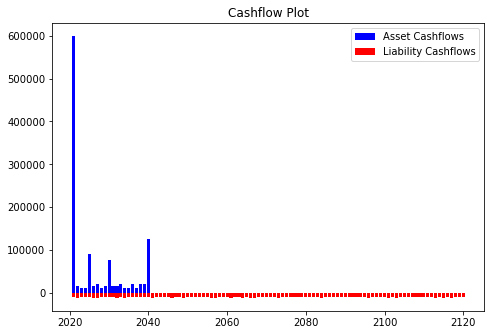

In [6]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis=cfs['Year']
y_axis=cfs['Asset CFs']
ax.bar(x_axis,cfs['Asset CFs'],color='b')
ax.bar(x_axis,-cfs['Liab CFs'],color='r')
ax.legend(['Asset Cashflows','Liability Cashflows'])
ax.set_title('Cashflow Plot')
plt.show()